# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras as K

# Create dataset

In [14]:
CIRCLE = np.array([1,0])
SQUARE = np.array([0,1])

image_width = 28

def new_batch(N_batch):
    y_in = np.zeros([N_batch,image_width**2])
    y_res = np.zeros([N_batch,2])
    
    for k in range(0,N_batch):
        cs = np.random.uniform(low=0,high=1)
        if cs >= 0.5:
            y_in[k] = new_square().reshape(image_width**2)
            y_res[k] = SQUARE
        else: 
            y_in[k] = new_circle().reshape(image_width**2)
            y_res[k] = CIRCLE
            
    return y_in, y_res

def new_square():
    newimage = np.zeros([image_width,image_width])
    size = np.random.randint(1,20)
    loc = np.random.randint(0, image_width-size, size=2)
    
    newimage[loc[0]:(loc[0]+size),loc[1]:(loc[1]+size)]=1
    
    return newimage

def new_circle():
    newimage = np.zeros([image_width,image_width])
    size = np.random.randint(1,13)

    m = min(size, image_width-size)
    M = max(size, image_width-size)
    
    loc = np.random.randint(m, M, size=2)
        
    for i in range(0,image_width):
        for j in range(0,image_width):
            if np.sqrt((i-loc[0])**2+(j-loc[1])**2)<= size:
                newimage[i,j]=1
                
    return newimage

# Define neural network

In [15]:
def create_net():
    net = K.Sequential()
    net.add(K.layers.Dense(30,activation="relu", input_shape=(image_width**2,)))
    net.add(K.layers.Dense(2,activation="softmax"))
    net.compile(loss="categorical_crossentropy", optimizer=K.optimizers.SGD(lr=1.0), metrics=["categorical_accuracy"])
    return net

In [16]:
net = create_net()

# Train the neural network

In [17]:
N_batch = 100000
train_in, train_res = new_batch(N_batch)
hist = net.fit(train_in, train_res, batch_size=100, epochs=30, validation_split=0.1)

Train on 90000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
90000/90000 [==============================] - 1s 10us/sample - loss: 0.6428 - categorical_accuracy: 0.6192 - val_loss: 0.5704 - val_categorical_accuracy: 0.6710
Epoch 2/30
90000/90000 [==============================] - 1s 10us/sample - loss: 0.6178 - categorical_accuracy: 0.6396 - val_loss: 0.6702 - val_categorical_accuracy: 0.6126
Epoch 3/30
90000/90000 [==============================] - 1s 9us/sample - loss: 0.5857 - categorical_accuracy: 0.6631 - val_loss: 0.5290 - val_categorical_accuracy: 0.7232
Epoch 4/30
90000/90000 [==============================] - 1s 9us/sample - loss: 0.5036 - categorical_accuracy: 0.7348 - val_loss: 0.4792 - val_categorical_accuracy: 0.7640
Epoch 5/30
90000/90000 [==============================] - 1s 8us/sample - loss: 0.3919 - categorical_accuracy: 0.8103 - val_loss: 0.4180 - val_categorical_accuracy: 0.7969
Epoch 6/30
90000/90000 [================

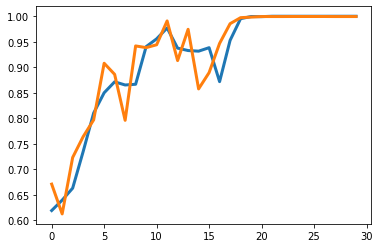

In [18]:
fig = plt.figure()
plt.plot(hist.history['categorical_accuracy'], linewidth = 3)
plt.plot(hist.history['val_categorical_accuracy'], linewidth=3)
plt.show()

# Analyze the network accuracy

In [33]:
def show_image(which):
    fig = plt.figure()
    plt.imshow(np.reshape(which,[28,28]),interpolation='nearest', cmap='binary')
    plt.show()

def partial_test(start, stop,show_mistakes=False):
    predictions = net.predict_on_batch(test_in[start:stop,:])
    predictions_val = np.argmax(predictions,axis = 1)
    true_val = np.argmax(test_res[start:stop,:], axis=1)
    print("Predictions", predictions_val)
    print("True labels", true_val)
    
    which = np.where(true_val!=predictions_val)[0]

    if show_mistakes == 1:
        for j in which:
            show_image(test_in[j])
            print("True ", true_val[j], " - Predicted ", predictions_val[j], " with prob. ", predictions[j,predictions_val[j]])
       

    return len(which)/(stop-start)*100

Predictions [1 1 1 ... 0 0 1]
True labels [1 1 1 ... 0 0 1]


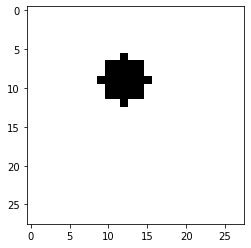

True  0  - Predicted  1  with prob.  0.572051


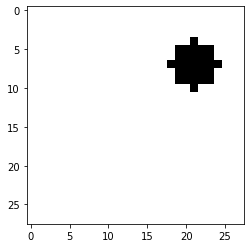

True  0  - Predicted  1  with prob.  0.99994314
Accuracy:  99.96 %


In [34]:
N_test = 5000
test_in, test_res = new_batch(N_test)
errors = partial_test(0,N_test,1)
print("Accuracy: ",100.-errors,"%")

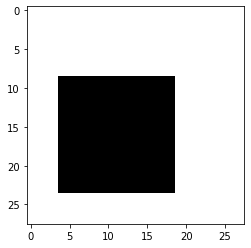

In [28]:
show_image(new_square())

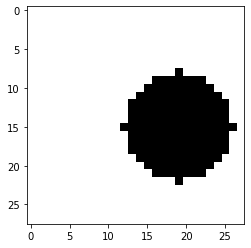

In [32]:
show_image(new_circle())